# Business Problem Understanding

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligiblity for loan.

Company wants to automate the loan eligibility process(real time) based on customer detail provided while filling online application form. These deails are Gender, Marital status,Education, No. of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the custtomers segments that are eligible for loan amount so that they can specifically target these customers.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Loan_ID'].nunique()

614

**Drop unimportant columns as per feature selection(Filter Methods)**

In [7]:
df.drop(columns=['Loan_ID'],inplace=True)

In [8]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [11]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

**Create New columns as per requirements**

In [17]:
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [18]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [19]:
df['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [20]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [22]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [23]:
df['Credit_History'] = df['Credit_History'].replace({1:'good',0:'bad'})

In [24]:
df['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [25]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [26]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [27]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [28]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [29]:
continous = ['Income','LoanAmount']

discrete_categorical = ['Gender','Married','Education','Self_Employed',
                        'Property_Area','Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

**Exploratory Data Analysis(EDA)**

**for continous variables**

In [31]:
df[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


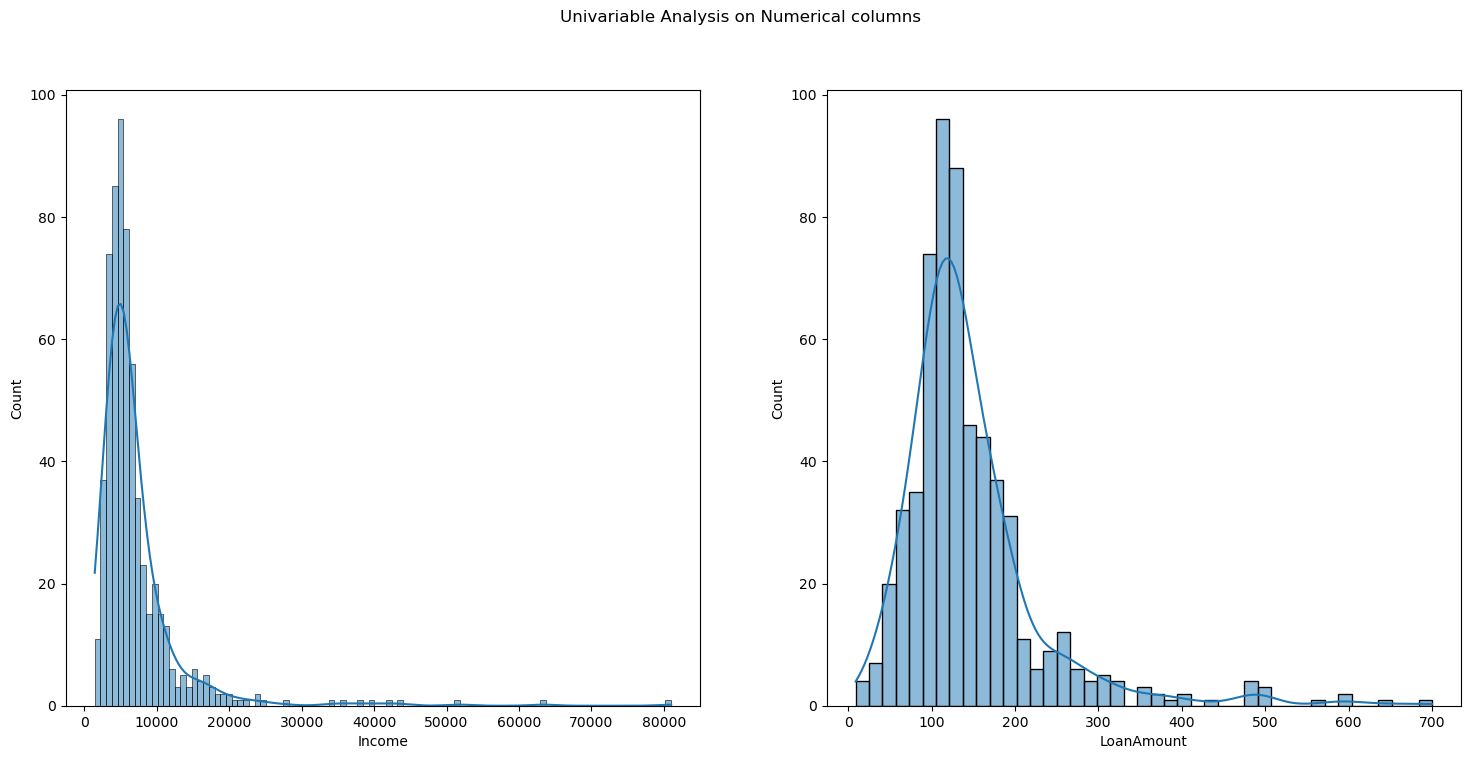

In [32]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(df['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'],kde=True)

plt.suptitle('Univariable Analysis on Numerical columns')
plt.show()

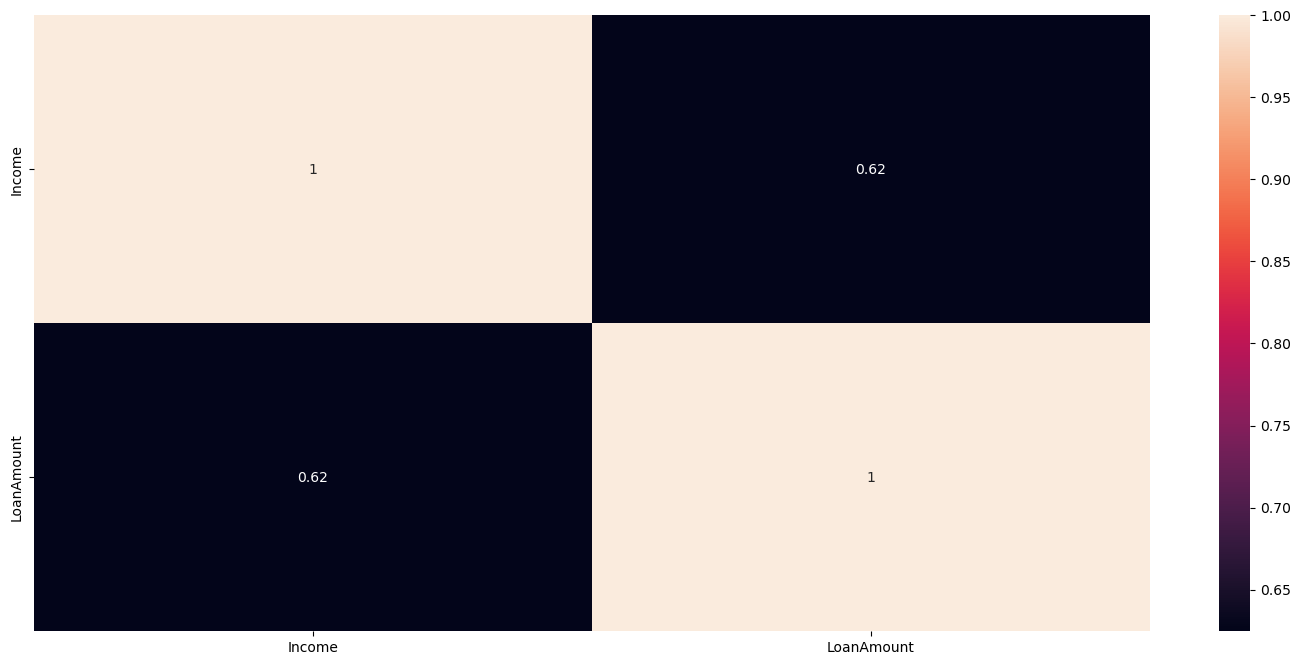

In [33]:
sns.heatmap(df[continous].corr(),annot=True);

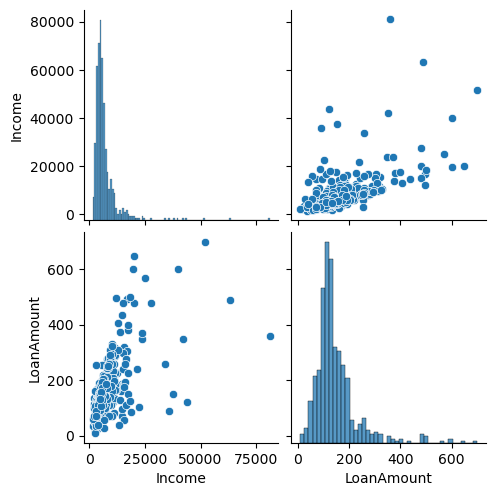

In [34]:
 sns.pairplot(df[continous]);

**for discrete variables**

In [36]:
 df[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,614,582,614,614
unique,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Semiurban,Y
freq,489,398,480,500,233,422


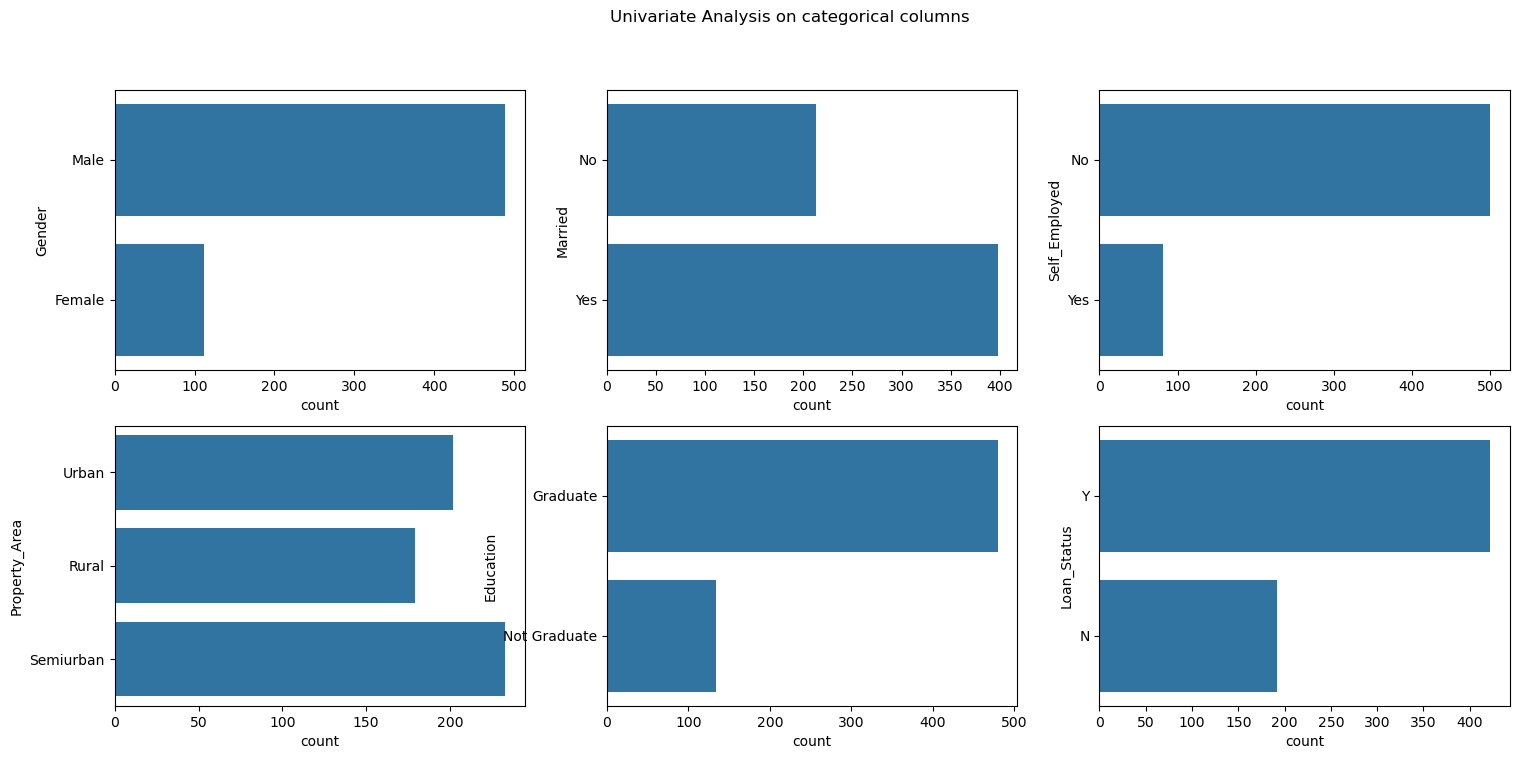

In [37]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,2)
sns.countplot(df['Married'])

plt.subplot(2,3,3)
sns.countplot(df['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(df['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(df['Education'])

plt.subplot(2,3,6)
sns.countplot(df['Loan_Status'])

plt.suptitle('Univariate Analysis on categorical columns')
plt.show()

In [38]:
# Lets compare all the categories with respect to the Loan Status to understand the overall impact

print('Impact of Marriage on Loan Status')
print(pd.crosstab(df['Loan_Status'],df['Married']))
print('\n')

print('Impact of Dependents on Loan Status')
print(pd.crosstab(df['Loan_Status'],df['Dependents']))
print('\n')

print('Impact of Education on Loan Status')
print(pd.crosstab(df['Loan_Status'],df['Education']))
print('\n')

print('Impact of Employment on Loan Status')
print(pd.crosstab(df['Loan_Status'],df['Self_Employed']))
print('\n')

print('Impact of Property on Loan Status')
print(pd.crosstab(df['Loan_Status'],df['Property_Area'])) 

Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


**check for Missing values**

In [40]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**check for Skewness**

In [42]:
df[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

**check for Outliers**

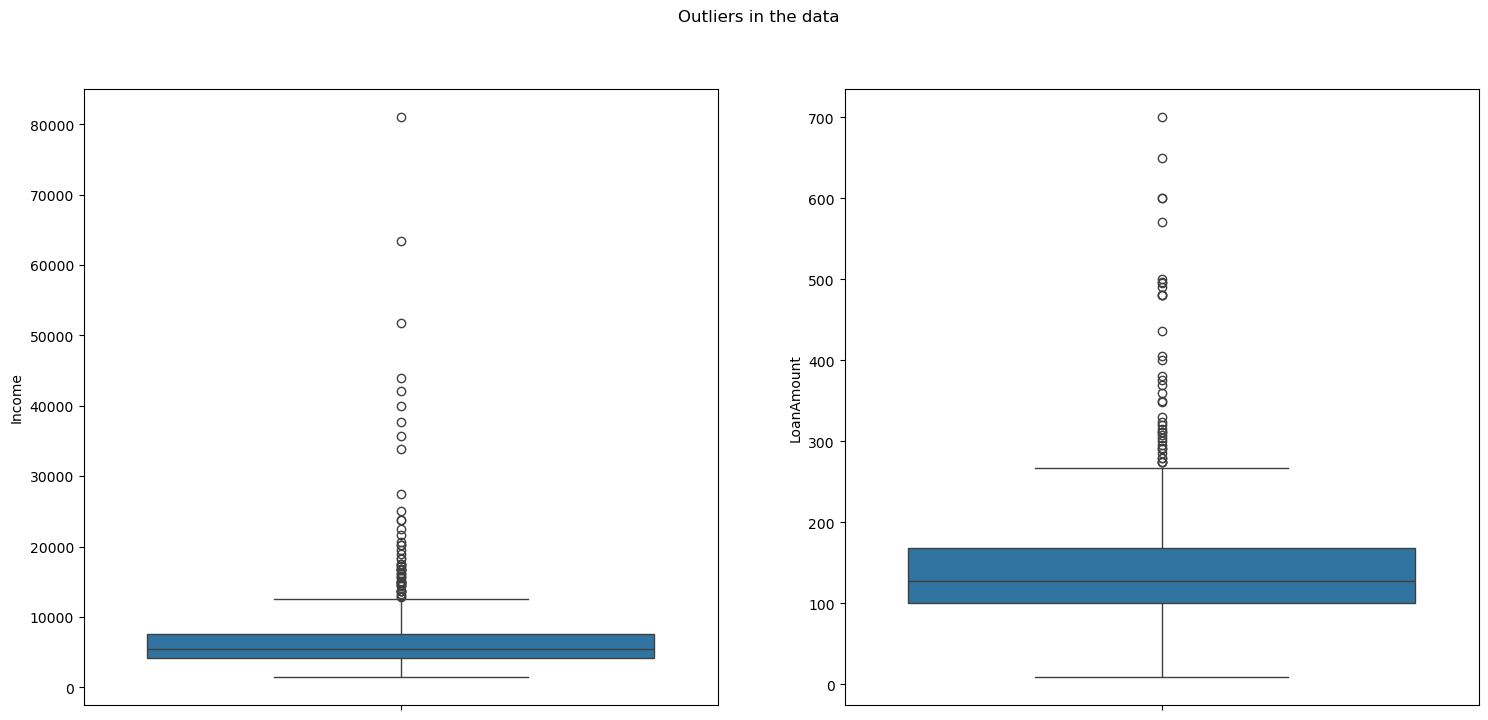

In [44]:
# Lets visualize the outliers using Box Plot

plt.subplot(1,2,1)
sns.boxplot(df['Income'])

plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outliers in the data')
plt.show()

# Step-3 : Data Preparation

1. Data Cleaning
    - wrong data
    - wrong data type
    - duplicates
    - Missing values
    - outliers
2. Data Wrangling
    - transformation(applicable on continous varibles)
    - scaling(applicable on continous)
    - encoding(applicable on discrete categorical)
    - **Dont apply any Data Wrangling technique on Count Variable**

**wrong Data treatment**

In [47]:
df['Dependents'] = df['Dependents'].replace({'3+':3})

**Missing values treatment**

In [49]:
df['Dependents'] = df['Dependents'].fillna(0)

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df = df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

In [50]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

**data type conversion**

In [52]:
df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

In [53]:
df.duplicated().sum()

0

**outliers treatment**

In [55]:
#outliers should be retrained (because really some people will have high income)

**Encoding**

In [57]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Married'] = df['Married'].replace({'Yes':1,'No':0})
df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1,'No':0})
df['Property_Area'] = df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
df['Credit_History'] = df['Credit_History'].replace({'good':1,'bad':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})

df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

**transformation**

In [59]:
from scipy.stats import boxcox
df['Income'],a = boxcox(df['Income'])
df['LoanAmount'],c = boxcox(df['LoanAmount'])

In [60]:
df[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

**X&y**

In [62]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

**train-test split**

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70)

# Step-4 : Modelling & Evalustion

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 1.Logistic Regression

In [68]:
#Modelling 
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

#Evaluation
ypred_train = lg_model.predict(X_train)
ypred_test = lg_model.predict(X_test)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(lg_model,X_train,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


## 2.KNN
- HPT
- Modelling & Evaluation

In [70]:
#Hyperparameter Tuning
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,50))}

km_grid = GridSearchCV(estimator, param_grid, scoring='accuracy',cv=5)
km_grid.fit(X_train,y_train)

km_grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [71]:
#Modelling
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train,y_train)

#Evaluation
ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(knn_model,X_train,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.7541371158392435
CV Score: 0.7375910364145659
Test Accuracy: 0.7075471698113207


## 3.SVM
- HPT
- Modelling & Evaluation

In [73]:
#Hperparameter Tuning
estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
svm_grid.fit(X_train,y_train)
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [74]:
#Modelling
svm_model = SVC(C=0.1,kernel='linear')
svm_model.fit(X_train,y_train)

#Evaluation
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


## 3.Decision Tree Classifier
- HPT
- Identify important features by using feature selection(ensemble method)
- Modelling & Evaluation

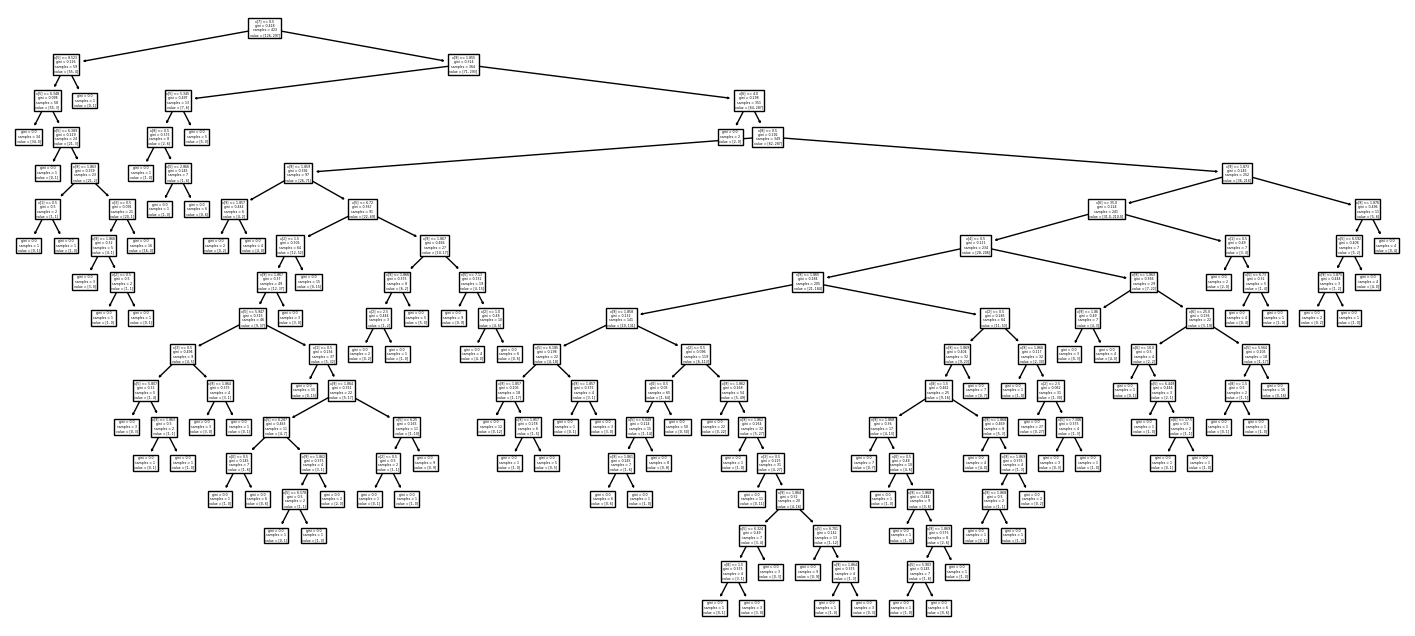

In [76]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

from sklearn.tree import plot_tree
plot_tree(model)
plt.show()

In [77]:
#Hperparameter Tuning
estimator = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'],
              'max_depth':list(range(1,16))}
dt_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
dt_grid.fit(X_train,y_train)
dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1)

In [142]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [148]:
#Important features
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])
important_feat_dt = feats_ab[feats_ab['Importance']>0].index.tolist()
important_feat_dt

['Credit_History']

**Creating Decision Tree Model with important parameters and important features**

In [157]:
#Selecting train & test data
X_train_dt = X_train[important_feat_dt]
X_test_dt = X_test[important_feat_dt]

#Modelling
dt.fit(X_train_dt,y_train)

#Evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


## 5.Random Forest Classifier
- HPT
- Identify important features by using feature selection(ensemble method)
- Modelling & Evaluation

In [165]:
#Hperparameter Tuning
estimator = RandomForestClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
rf_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
rf_grid.fit(X_train,y_train)
rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=21, random_state=True)

In [169]:
#Important features
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])
important_feat_rf = feats_ab[feats_ab['Importance']>0].index.tolist()
important_feat_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [171]:
#Selecting train & test data
X_train_rf = X_train[important_feat_rf]
X_test_rf = X_test[important_feat_rf]

#Modelling
rf.fit(X_train_rf,y_train)

#Evaluation
ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(rf,X_train_rf,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9952718676122931
CV Score: 0.8203641456582634
Test Accuracy: 0.7735849056603774


## 6.AdaBoost Classifier

In [174]:
#Hperparameter Tuning
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
ab_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
ab_grid.fit(X_train,y_train)
ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=3, random_state=True)

In [176]:
#Important features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])
important_feat_ab = feats_ab[feats_ab['Importance']>0].index.tolist()
important_feat_ab

['Credit_History', 'Property_Area', 'Income']

In [178]:
#Selecting train & test data
X_train_ab = X_train[important_feat_ab]
X_test_ab = X_test[important_feat_ab]

#Modelling
ab.fit(X_train_ab,y_train)

#Evaluation
ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(ab,X_train_ab,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.83451536643026
CV Score: 0.8298879551820729
Test Accuracy: 0.7641509433962265


## 7.Gradient Boost

In [181]:
#Hperparameter Tuning
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,10)),
              'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1.0]}
gb_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
gb_grid.fit(X_train,y_train)
gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.6, n_estimators=7, random_state=True)

In [185]:
#Important features
feats_ab = pd.DataFrame(data=gb.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])
important_feat_gb = feats_ab[feats_ab['Importance']>0].index.tolist()
important_feat_gb

['Gender',
 'Married',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [189]:
#Selecting train & test data
X_train_gb = X_train[important_feat_gb]
X_test_gb = X_test[important_feat_gb]

#Modelling
gb.fit(X_train_gb,y_train)

#Evaluation
ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(gb,X_train_gb,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8747044917257684
CV Score: 0.8228011204481793
Test Accuracy: 0.7358490566037735


## 8.XG Boost

In [196]:
#Hperparameter Tuning
estimator = XGBClassifier()
param_grid = {'n_estimators':[10,20,40,100],
              'max_depth':[3,4,5],
              'gamma':[0,0.15,0.3,0.5,1]}
xgb_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
xgb_grid.fit(X_train,y_train)
xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [198]:
#Important features
feats_ab = pd.DataFrame(data=xgb.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])
important_feat_xgb = feats_ab[feats_ab['Importance']>0].index.tolist()
important_feat_xgb

['Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [200]:
#Selecting train & test data
X_train_xgb = X_train[important_feat_xgb]
X_test_xgb = X_test[important_feat_xgb]

#Modelling
xgb.fit(X_train_xgb,y_train)

#Evaluation
ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8321513002364066
CV Score: 0.82515406162465
Test Accuracy: 0.7830188679245284


# Presentation

In [203]:
from joblib import dump

dump(dt,'loan.joblib')

['loan.joblib']

## Predict on new data

In [219]:
in_data = {'Loan_ID':'LP002991',
           'Gender':'Male',
           'Married':'No',
           'Dependents':1,
           'Education':'Graduate',
           'Self_Employed':'yes',
           'ApplicantIncome':1000,
           'CoapplicantIncome':0,
           'LoanAmount':100,
           'Loan_Amount_Term':240,
           'Credit_History':'bad',
           'Property_Area':'Urban',}

In [221]:
data = pd.DataFrame(in_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,bad,Urban


**Apply data preprocessing on Unknown data**

In [223]:
data.drop(columns=['Loan_ID'],inplace=True)
data['Income'] = data['ApplicantIncome']+data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

data['Dependents'] = data['Dependents'].fillna(0)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data = data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])
data['Dependents'] = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})
data['Married'] = data['Married'].replace({'Yes':1,'No':0})
data['Education'] = data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area'] = data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good':1,'bad':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

In [231]:
X_new = data
X_new

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,0,1,1,yes,100,20.0,0,2,1000


In [233]:
#Select Important Features of your best model
X_new = X_new[['Credit_History']]

#Apply & predict using your best model
dt.predict(X_new)

array([0], dtype=int64)